<a href="https://colab.research.google.com/github/sifat-hossain-niloy/Numerical_Analysis_Lab_3202/blob/main/Two_point_difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the value of x: 4
+----------------------+-------+-----------------------+------------------------+-----------------------+
|          h           | f'(x) | Forward Approximation | Backward Approximation | Central Approximation |
+----------------------+-------+-----------------------+------------------------+-----------------------+
|         10.0         |  51.0 |         271.0         |          31.0          |         151.0         |
|         9.99         |  51.0 |        270.6801       |   30.920099999999998   |   150.80010000000001  |
|         9.98         |  51.0 |        270.3604       |        30.8404         |        150.6004       |
|         9.97         |  51.0 |        270.0409       |   30.760900000000003   |        150.4009       |
|         9.96         |  51.0 |        269.7216       |   30.681600000000007   |   150.20160000000004  |
|  9.950000000000001   |  51.0 |   269.40250000000003  |   30.602500000000006   |   150.00250000000003  |
|  9.940000000000001  

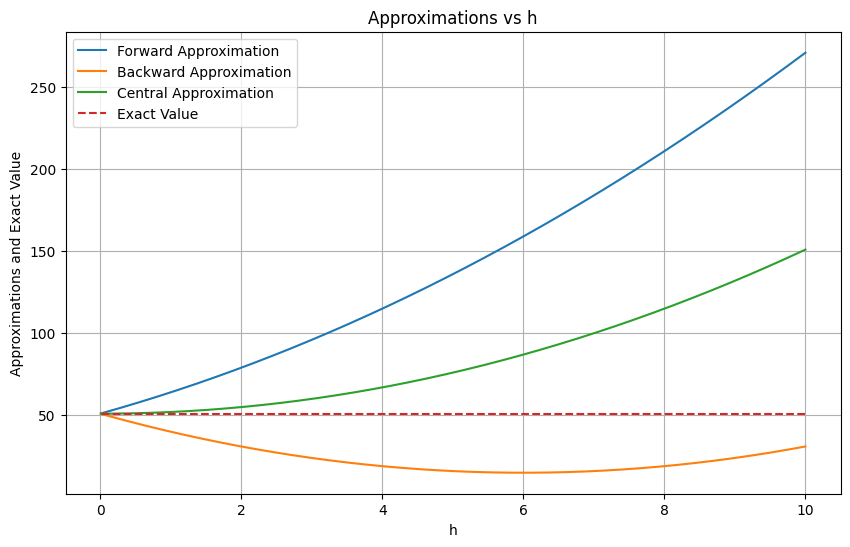

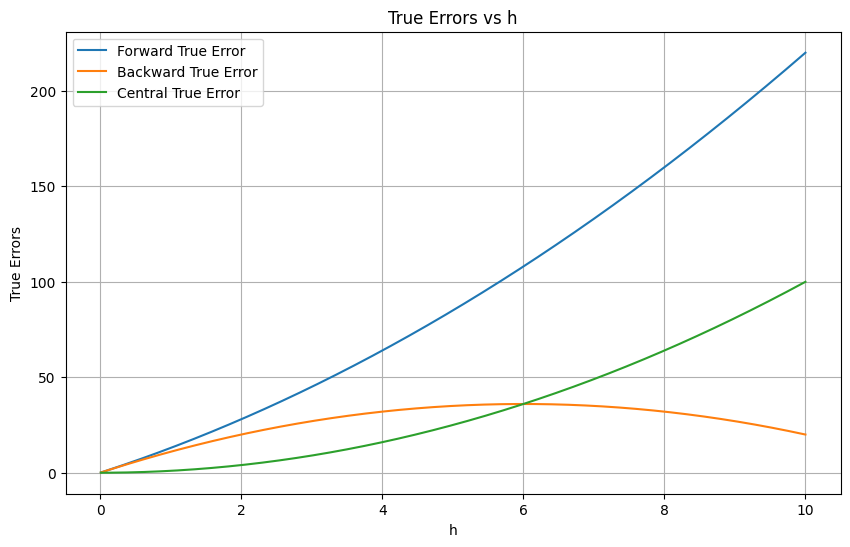

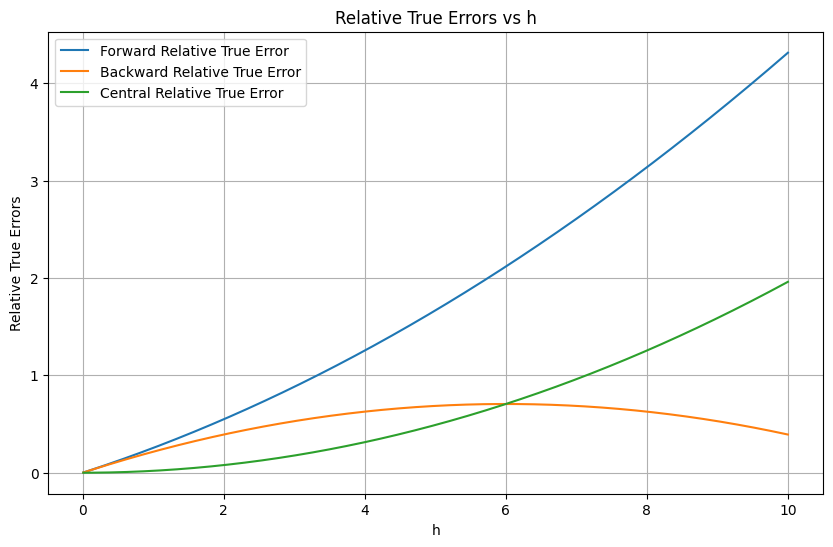

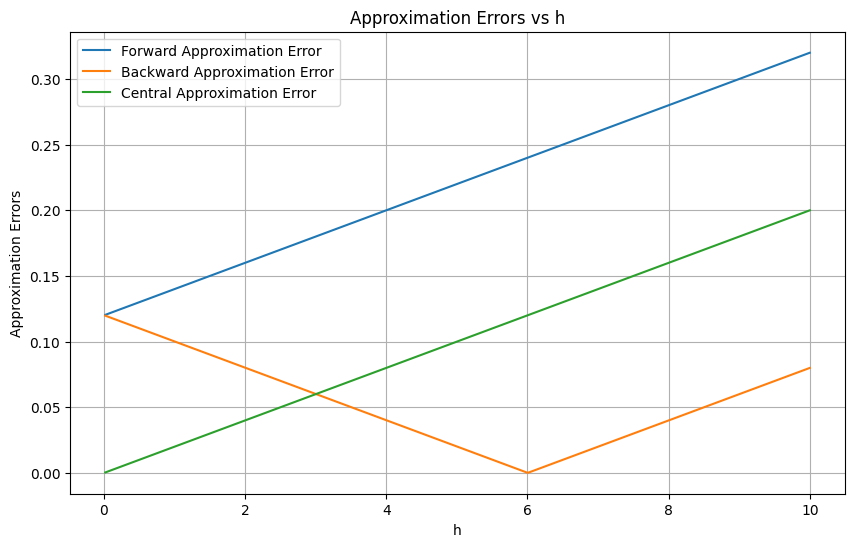

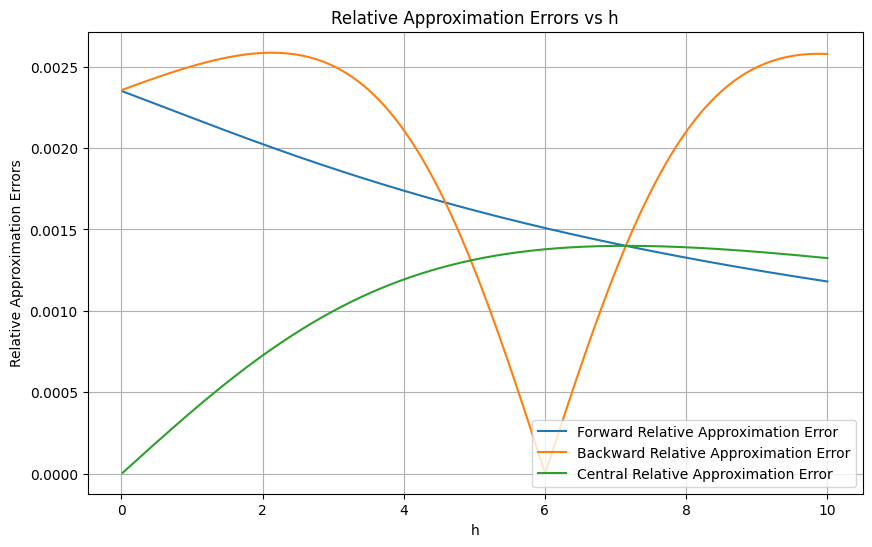

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Define f(x) and f'(x) as df
def f(x):
    return x**3 + 3*x

def df(x):
    return 3*x**2 + 3

# Define approximations
def forward_diff(f, x, h):
    return (f(x+h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x-h)) / h

def central_diff(f, x, h):
    return (f(x+h) - f(x-h)) / (2*h)

# Get value of x from the input
x = float(input("Enter the value of x: "))

h_values = np.arange(10, 0.009, -0.01)
forward_approx = [forward_diff(f, x, h) for h in h_values]
backward_approx = [backward_diff(f, x, h) for h in h_values]
central_approx = [central_diff(f, x, h) for h in h_values]
exact_values = [df(x) for h in h_values]

# Compute true errors
true_errors_forward = np.abs(np.array(forward_approx) - df(x))
true_errors_backward = np.abs(np.array(backward_approx) - df(x))
true_errors_central = np.abs(np.array(central_approx) - df(x))

# Compute relative true errors
relative_true_errors_forward = true_errors_forward / df(x)
relative_true_errors_backward = true_errors_backward / df(x)
relative_true_errors_central = true_errors_central / df(x)

# Compute approximation errors
approx_errors_forward = np.abs(np.array(forward_approx[:-1]) - np.array(forward_approx[1:]))
approx_errors_backward = np.abs(np.array(backward_approx[:-1]) - np.array(backward_approx[1:]))
approx_errors_central = np.abs(np.array(central_approx[:-1]) - np.array(central_approx[1:]))

# Compute relative approximation errors
relative_approx_errors_forward = approx_errors_forward / np.array(forward_approx[:-1])
relative_approx_errors_backward = approx_errors_backward / np.array(backward_approx[:-1])
relative_approx_errors_central = approx_errors_central / np.array(central_approx[:-1])



# Create the table using PrettyTable
table = PrettyTable()
table.field_names = ["h", "f'(x)", "Forward Approximation", "Backward Approximation", "Central Approximation"]

for h, fwd, bck, cnt in zip(h_values, forward_approx, backward_approx, central_approx):
    table.add_row([h, df(x), fwd, bck, cnt])

print(table)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(h_values, forward_approx, label="Forward Approximation")
plt.plot(h_values, backward_approx, label="Backward Approximation")
plt.plot(h_values, central_approx, label="Central Approximation")
plt.plot(h_values, exact_values, label="Exact Value", linestyle="--")
plt.xlabel("h")
plt.ylabel("Approximations and Exact Value")
plt.legend()
plt.title("Approximations vs h")
plt.grid(True)
plt.show()

# Plotting True Errors vs h
plt.figure(figsize=(10, 6))
plt.plot(h_values, true_errors_forward, label="Forward True Error")
plt.plot(h_values, true_errors_backward, label="Backward True Error")
plt.plot(h_values, true_errors_central, label="Central True Error")
plt.xlabel("h")
plt.ylabel("True Errors")
plt.legend()
plt.title("True Errors vs h")
plt.grid(True)
plt.show()

# Plotting Relative True Errors vs h
plt.figure(figsize=(10, 6))
plt.plot(h_values, relative_true_errors_forward, label="Forward Relative True Error")
plt.plot(h_values, relative_true_errors_backward, label="Backward Relative True Error")
plt.plot(h_values, relative_true_errors_central, label="Central Relative True Error")
plt.xlabel("h")
plt.ylabel("Relative True Errors")
plt.legend()
plt.title("Relative True Errors vs h")
plt.grid(True)
plt.show()

# Plotting Approximation Errors vs h
plt.figure(figsize=(10, 6))
plt.plot(h_values[:-1], approx_errors_forward, label="Forward Approximation Error")
plt.plot(h_values[:-1], approx_errors_backward, label="Backward Approximation Error")
plt.plot(h_values[:-1], approx_errors_central, label="Central Approximation Error")
plt.xlabel("h")
plt.ylabel("Approximation Errors")
plt.legend()
plt.title("Approximation Errors vs h")
plt.grid(True)
plt.show()

# Plotting Relative Approximation Errors vs h
plt.figure(figsize=(10, 6))
plt.plot(h_values[:-1], relative_approx_errors_forward, label="Forward Relative Approximation Error")
plt.plot(h_values[:-1], relative_approx_errors_backward, label="Backward Relative Approximation Error")
plt.plot(h_values[:-1], relative_approx_errors_central, label="Central Relative Approximation Error")
plt.xlabel("h")
plt.ylabel("Relative Approximation Errors")
plt.legend()
plt.title("Relative Approximation Errors vs h")
plt.grid(True)
plt.show()

